In [1]:
#Importation des library necessaire 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Exploration des données

In [2]:
#Importation de la base de donnees 
df = pd.read_csv('C:/Users/tijaa/Downloads/Base Global Smart2019_appur1.csv')

In [3]:
#Dimension de la base
df.shape

(5581, 40)

In [4]:
#Afficher l'en-tete de la base de donnees
df.head()

,SURVDATE,strate,milieu,grappe,TEAM,HH,ID,SEX,BIRTHDAT,MONTHS,...,TRAITEAU,TOILET,poids,filter_$,DF1,TF2,MAG,RCG,Allait_Exclu,DF2
0,1582-10-14,8.0,NaN,4.0,2.0,17.0,2.0,2.0,1582-10-14,5.91,...,NaN,NaN,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
1,1582-10-14,8.0,NaN,3.0,1.0,12.0,1.0,2.0,1582-10-14,5.62,...,NaN,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
2,1582-10-14,8.0,NaN,5.0,3.0,23.0,1.0,1.0,1582-10-14,5.59,...,NaN,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
3,1582-10-14,8.0,NaN,5.0,3.0,20.0,2.0,2.0,1582-10-14,5.39,...,NaN,NaN,1.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
4,1582-10-14,8.0,NaN,8.0,3.0,10.0,2.0,2.0,1582-10-14,5.32,...,NaN,NaN,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0


In [5]:
#Les variables de la base de donnees 
df.columns

Index(['SURVDATE', 'strate', 'milieu', 'grappe', 'TEAM', 'HH', 'ID', 'SEX',
       'BIRTHDAT', 'MONTHS', 'age_class', 'WEIGHT', 'HEIGHT', 'EDEMA', 'MUAC',
       'WAZWHO', 'HAZWHO', 'WHZWHO', 'WTFACTOR', 'RMQPART', 'DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TRAITEAU', 'TOILET', 'poids',
       'filter_$', 'DF1', 'TF2', 'MAG', 'RCG', 'Allait_Exclu', 'DF2'],
      dtype='object')

In [6]:
#Les types des variables 
df.dtypes

SURVDATE         object
strate          float64
milieu          float64
grappe          float64
TEAM            float64
HH              float64
ID              float64
SEX             float64
BIRTHDAT         object
MONTHS          float64
age_class       float64
WEIGHT          float64
HEIGHT          float64
EDEMA            object
MUAC            float64
WAZWHO          float64
HAZWHO          float64
WHZWHO          float64
WTFACTOR        float64
RMQPART          object
DOCOFFIC        float64
VITAMINA        float64
ALAITAPR        float64
MISESEIN        float64
ALAITENC        float64
ALIMLIQU        float64
ALIMSOLI        float64
DISPOLAV        float64
PRATLAV         float64
SOUREAU         float64
TRAITEAU        float64
TOILET          float64
poids           float64
filter_$        float64
DF1             float64
TF2             float64
MAG             float64
RCG             float64
Allait_Exclu    float64
DF2             float64
dtype: object

# 	Preprocessing des données



In [7]:
#Suppression des variables qui ne sont pas intéressantes
variables_a_supprimer = ['poids','filter_$','DF1','TF2','DF2','BIRTHDAT','SURVDATE','RMQPART','MAG','RCG','TRAITEAU']
df = df.drop(variables_a_supprimer, axis=1)

<Axes: >

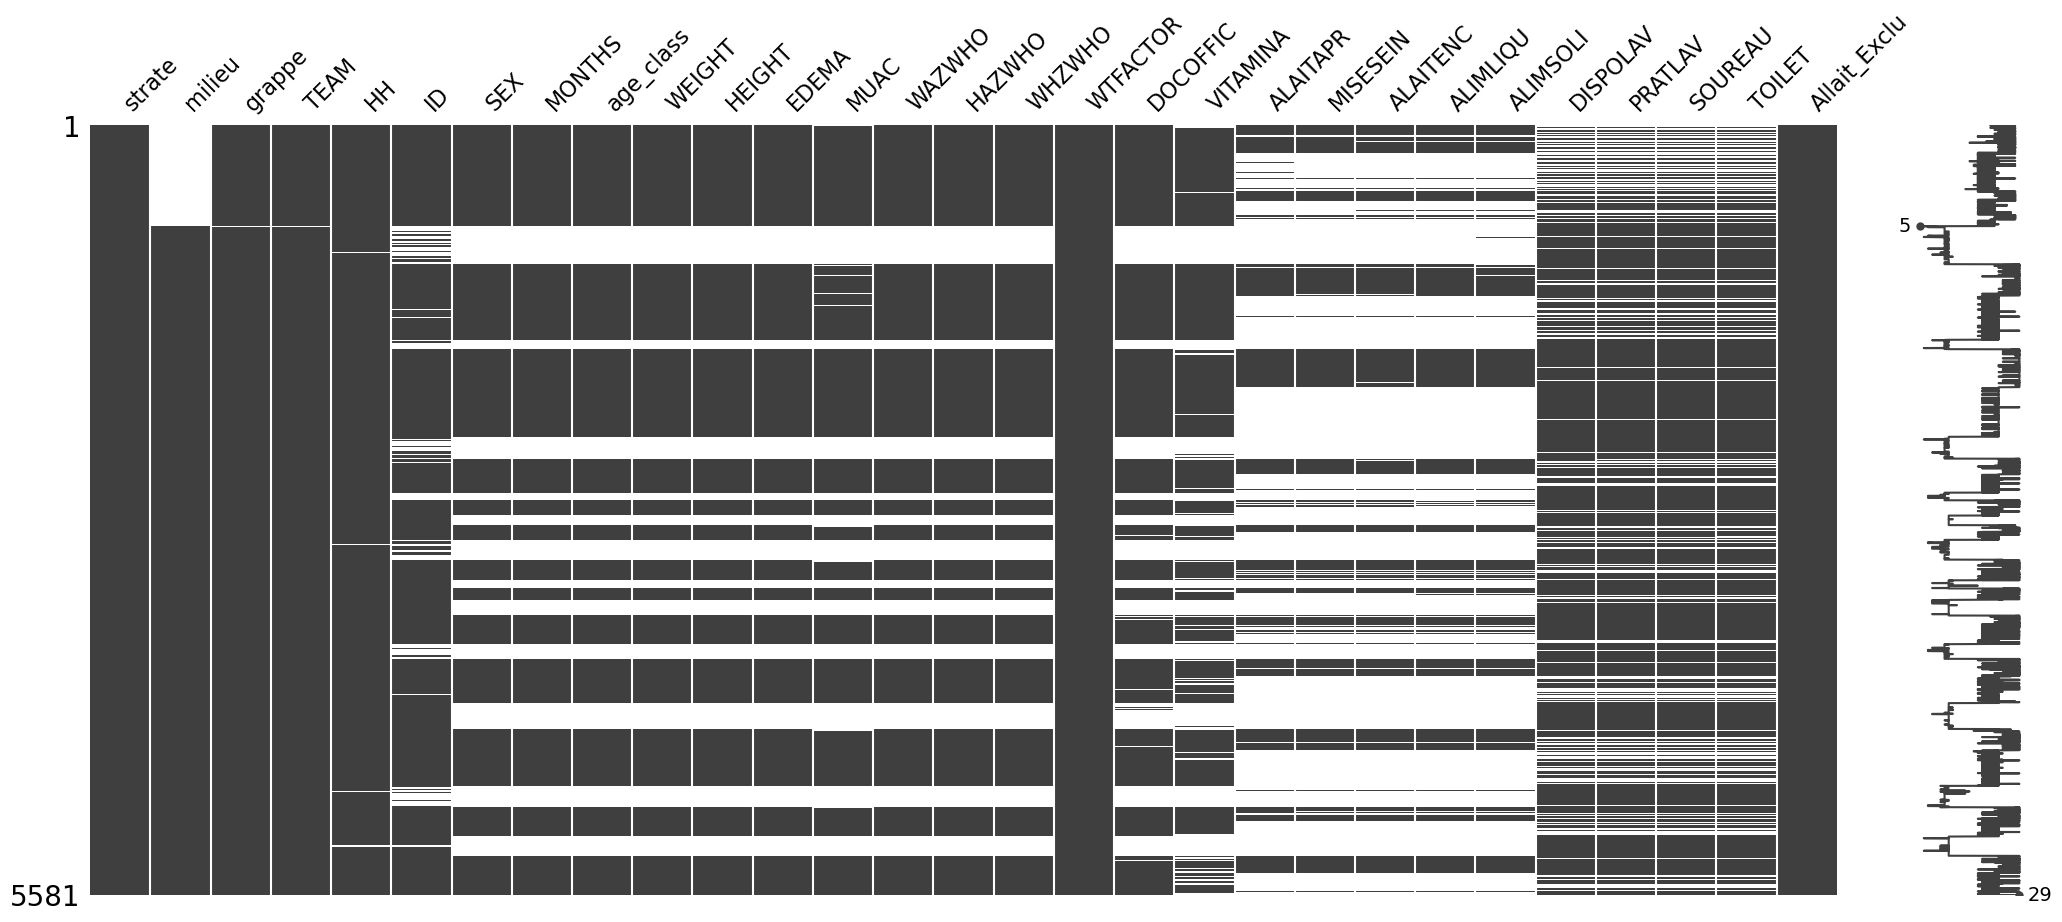

In [8]:
#matrice des valeur manquantes pour les voir visuellement
msno.matrix(df)

Au cours de l'exploration de la base de donnees, J'ai pu remarqué que dans la variable RMQPART, qu'il est notifié que dans certains ménages qu'ils ont visité les enquêteurs, ces dernier ont remarqué des ménages vides, pas d'enfants de moins de 5 ans, ce qui fait qu'on se retrouve avec beaucoup des données manquantes sur plusieurs variables. Du coup pour ce faire j'ai decidé de supprimer les observations qui ont des valeurs manquantes sur des variables pertinentes telle (ID, SEX, Edeme, muac etc.)

In [9]:
# Liste des variables nécessitant des valeurs non manquantes
variables_requises = ["SEX", "MONTHS", "WEIGHT","HEIGHT", "EDEMA", "MUAC","WAZWHO", "HAZWHO", "WHZWHO"]

# Suppression des individus avec des valeurs manquantes sur les variables spécifiées
df.dropna(subset=variables_requises, inplace=True)

In [10]:
#Encodage de la variable 'EDEMA'

variable_qualitative = df["EDEMA"]
df["EDEMA"] = variable_qualitative.map({"y": 1, "n": 2})

# 1) Identification et traitements des valeurs aberrantes 



In [11]:
# exclusion des Z-scores hors norme 
df = df[(df['WHZWHO'] >= -5) & (df['WHZWHO'] <= 5)]
df = df[(df['HAZWHO'] >= -6) & (df['HAZWHO'] <= 6)]
df = df[(df['WAZWHO'] >= -6) & (df['WAZWHO'] <= 5)]

In [12]:
df3 = df[['MONTHS','HEIGHT','WEIGHT','MUAC']]

In [13]:
df3.columns

Index(['MONTHS', 'HEIGHT', 'WEIGHT', 'MUAC'], dtype='object')

<Axes: >

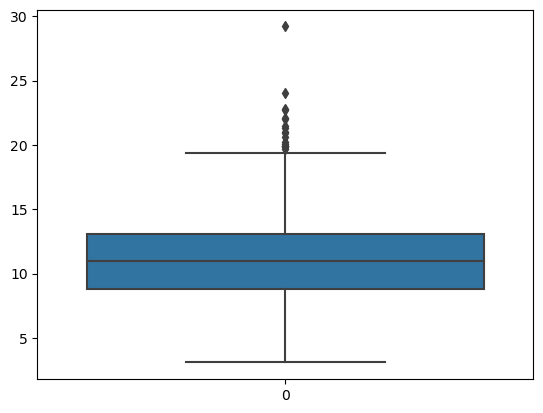

In [40]:
sns.boxplot(df3['WEIGHT']) 

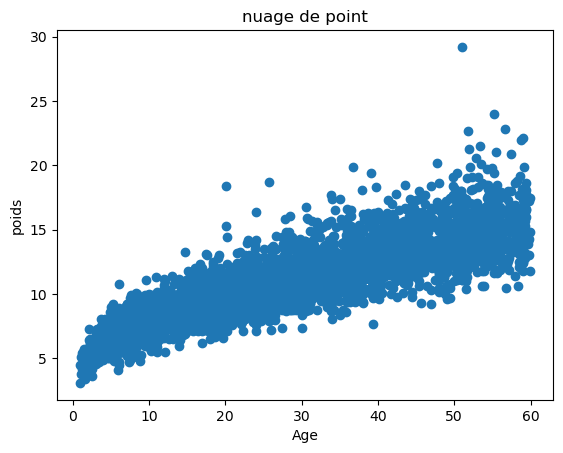

In [15]:
plt.scatter(x=df3['MONTHS'],y=df3['WEIGHT'])
plt.title('nuage de point')
plt.xlabel('Age')
plt.ylabel('poids')
plt.show()

<Axes: >

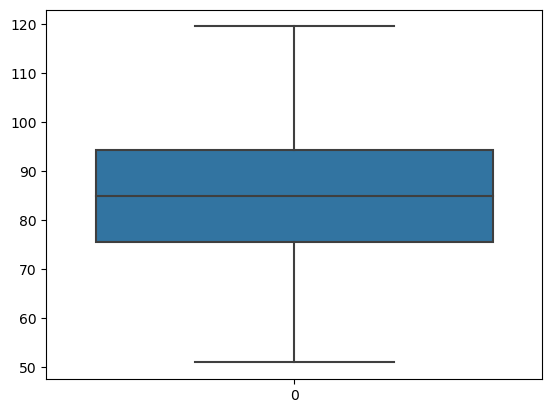

In [16]:
sns.boxplot(df3['HEIGHT'])

<Axes: >

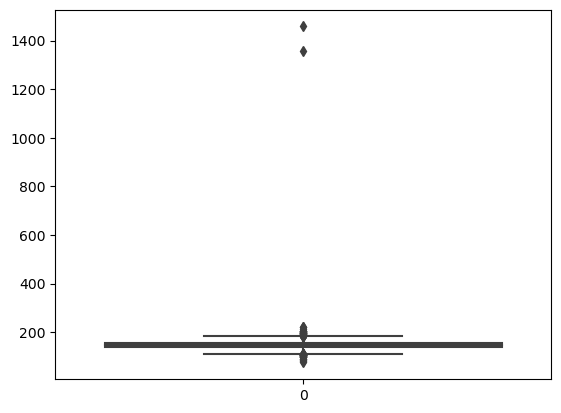

In [17]:
sns.boxplot(df3['MUAC'])

<Axes: >

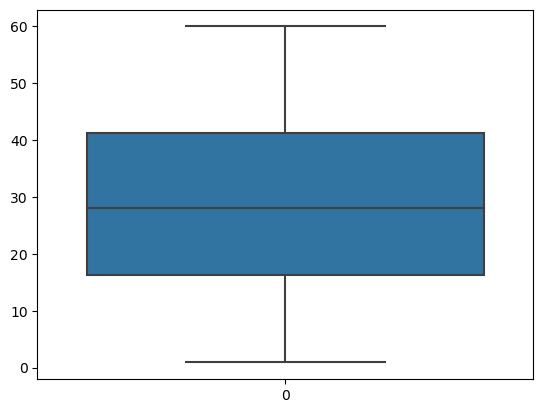

In [18]:
sns.boxplot(df3['MONTHS'])

In [19]:
seuil = 1000
df.loc[df['MUAC'] > seuil, 'MUAC'] = np.nan

In [20]:
seuil = 26
df.loc[df['WEIGHT'] > seuil, 'WEIGHT'] = np.nan

In [21]:
#fonction pour detecter et afficher les indices des valeurs 

def detecter_valeurs_aberrantes(data, seuil= 6):
    mean = np.mean(data)
    std = np.std(data)
    threshold = std * seuil
    aberrant_indices = np.where(np.abs(data - mean) > threshold)[0]
    return aberrant_indices
 

In [22]:
data = df3['MUAC']
aberrant_indices = detecter_valeurs_aberrantes(data)
print("Indices des valeurs aberrantes :", aberrant_indices)

Indices des valeurs aberrantes : [1461 3707]


### b) Identification des valeurs manquantes

In [23]:
valeur_manquante = df.isnull().sum()
pourcentage = ((valeur_manquante/len(df))*100 )
d = pd.DataFrame({'valeur manquante ' : valeur_manquante, 'pourcentage des valeur manquante' : pourcentage})
d

,valeur manquante,pourcentage des valeur manquante
strate,0,0.000000
milieu,723,18.239152
grappe,1,0.025227
TEAM,0,0.000000
HH,1,0.025227
ID,16,0.403633
SEX,0,0.000000
MONTHS,0,0.000000
age_class,0,0.000000
WEIGHT,1,0.025227


In [24]:
df.shape

(3964, 29)

In [25]:
# suppresion des deux individus qui ont des valeurs manquantes sur les variables ('grappe'et 'HH')
variables_requises = ['grappe','HH','WEIGHT','MUAC']

# Suppression des individus avec des valeurs manquantes sur les variables spécifiées
df.dropna(subset=variables_requises, inplace=True)


In [26]:
df.shape

(3959, 29)

In [27]:
df.isnull().sum()

strate             0
milieu           722
grappe             0
TEAM               0
HH                 0
ID                16
SEX                0
MONTHS             0
age_class          0
WEIGHT             0
HEIGHT             0
EDEMA              0
MUAC               0
WAZWHO             0
HAZWHO             0
WHZWHO             0
WTFACTOR           0
DOCOFFIC          38
VITAMINA         311
ALAITAPR        2314
MISESEIN        2340
ALAITENC        2332
ALIMLIQU        2331
ALIMSOLI        2326
DISPOLAV        1159
PRATLAV         1161
SOUREAU         1162
TOILET          1177
Allait_Exclu       0
dtype: int64

### c) Imputation des valeurs manquantes avec l'algorithme RF

l'algorithme Random Forest est souvent choisi pour imputer des valeurs manquantes dans un jeu de données en raison de sa capacité à capturer des relations complexes, sa robustesse aux valeurs aberrantes, sa prise en compte des interactions entre les variables, sa gestion du contexte global, sa capacité à éviter le surapprentissage, sa flexibilité etc.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Mettre de coter les variable qui ont 0 valeurs manquantes 
var = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TOILET','ID']
df1 = df.drop(var,axis=1)

In [30]:
var = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TOILET']
df[var] = df[var].astype('category')

In [31]:
df.dtypes

strate           float64
milieu          category
grappe           float64
TEAM             float64
HH               float64
ID               float64
SEX              float64
MONTHS           float64
age_class        float64
WEIGHT           float64
HEIGHT           float64
EDEMA              int64
MUAC             float64
WAZWHO           float64
HAZWHO           float64
WHZWHO           float64
WTFACTOR         float64
DOCOFFIC        category
VITAMINA        category
ALAITAPR        category
MISESEIN        category
ALAITENC        category
ALIMLIQU        category
ALIMSOLI        category
DISPOLAV        category
PRATLAV         category
SOUREAU         category
TOILET          category
Allait_Exclu     float64
dtype: object

In [32]:
#Creation d'une fonction pour imputer les valeurs manquantes pour chaque variable categorielle grace à l'algorithme de RF

variables = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TOILET','ID']

def imputation(vari):
    precision =[]
    for vari in variables :
        df1[vari] = df[vari]
        df_missing = df1[df1[vari].isnull()]
        df_not_missing = df1[df1[vari].notnull()]
        X_train, X_test, y_train, y_test = train_test_split(
        df_not_missing.drop([vari], axis=1),
        df_not_missing[vari],
        test_size=0.2,
        random_state=42
        )
        rf = RandomForestClassifier()
        #clf= DecisionTreeClassifier()
        rf.fit(X_train, y_train)
        predictions = rf.predict(df_missing.drop([vari], axis=1))
        df1.loc[df1[vari].isnull(),vari] = predictions
        score=rf.score(X_test,y_test)
        precision.append(score)
    return precision
    

In [33]:
imputation(variables)

[0.9922839506172839,
 0.8445859872611465,
 0.8054794520547945,
 0.9148936170212766,
 0.8549382716049383,
 0.7300613496932515,
 0.7914110429447853,
 0.8715596330275229,
 0.8410714285714286,
 0.8625,
 0.8946428571428572,
 0.8545780969479354,
 0.7198986058301647]

## 3) Traitements des doublons et ajustement sur quelque variables

In [34]:
#Identification des doublons

dup= df1[df1.duplicated()]
if not dup.empty:
  print("doublons trouver:")
  print(dup)
else :
  print("pas de doublons")

doublons trouver:
      strate  grappe  TEAM   HH  SEX  MONTHS  age_class  WEIGHT  HEIGHT  \
3641     3.0    30.0   3.0  4.0  2.0   12.25        3.0    10.0    82.9   
3667     3.0    30.0   3.0  8.0  1.0   28.55        4.0    12.3    93.4   

      EDEMA  ...  ALAITAPR  MISESEIN  ALAITENC  ALIMLIQU  ALIMSOLI  DISPOLAV  \
3641      2  ...       1.0       1.0       1.0       2.0       2.0       2.0   
3667      2  ...       1.0       1.0       1.0       1.0       1.0       2.0   

     PRATLAV SOUREAU TOILET   ID  
3641     2.0     2.0    2.0  1.0  
3667     2.0     2.0    2.0  1.0  

[2 rows x 29 columns]


In [35]:
#Suppression des doublons
df1 = df1.drop_duplicates()

In [36]:
 df1.shape

(3957, 29)

In [37]:
#Encodage de la variable strate en fonction de leur nom de region
dic= {1:'Djibouti_center',2:'Balbala',3:'Region Ali Sabieh',4:'Region Dikhil',5:'Region Tadjourah',6:'Region Obock',7:'Region Arta',8:'Camp Ali Addhe',9:'Camp Holl Holl',10:'Camp Merkazi'}
df1['region'] = df1['strate'].replace(dic)

In [38]:
#remplacer la valeur null d'une variable 
df1['DOCOFFIC']=df1['DOCOFFIC'].replace(0,2)

In [42]:
#Ajustements des variables selon leur type 

variables_float = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TOILET','SEX','EDEMA','ID','Allait_Exclu',
        'HH','age_class','strate','grappe','TEAM']
df1[variables_float] = df1[variables_float].astype(int)

variables_int = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TOILET','SEX','EDEMA','Allait_Exclu',
        'age_class','strate','grappe']

df1[variables_int] = df1[variables_int].astype('category')

In [43]:
#reindexation des variables

variable = ['strate', 'grappe','TEAM','ID', 'HH', 'SEX', 'MONTHS', 'age_class', 'WEIGHT',
       'HEIGHT', 'EDEMA', 'MUAC', 'WAZWHO', 'HAZWHO', 'WHZWHO', 'WTFACTOR',
       'region', 'DOCOFFIC','milieu', 'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC',
       'ALIMLIQU', 'ALIMSOLI', 'DISPOLAV', 'PRATLAV', 'SOUREAU',
       'TOILET','Allait_Exclu']
df1 = df1.reindex(columns=variable)

In [44]:
# exclusion des Z-scores hors norme 
df1 = df1[(df1['WHZWHO'] >= -5) & (df1['WHZWHO'] <= 5)]
df1 = df1[(df1['HAZWHO'] >= -6) & (df1['HAZWHO'] <= 6)]
df1 = df1[(df1['WAZWHO'] >= -6) & (df1['WAZWHO'] <= 5)]

In [45]:
# Creation de la variable a expliquer  'Malnutrition aigue globale ' en utilisant l'indicateur WAZWHO (Weight-for-Age Z-Score).
mag=[]
for i in df1['WAZWHO'] :
    if i < - 2 :
        mag.append(1)
    else :
        mag.append(2)
   

In [46]:
df1['EN'] = mag

In [47]:
df1['EN'] = df1['EN'].astype('category')

In [48]:
df1.shape

(3957, 31)

In [49]:
df1["SEX"] = df1["SEX"].map({1 :"M " , 2: "F"})

In [50]:
df1["EN"] = df1["EN"].map({1 :"EN- " , 2:"EN+"})

In [51]:
df1["milieu"] = df1["milieu"].map({1 :"urb " , 2:"rur"})

In [52]:
df1.columns

Index(['strate', 'grappe', 'TEAM', 'ID', 'HH', 'SEX', 'MONTHS', 'age_class',
       'WEIGHT', 'HEIGHT', 'EDEMA', 'MUAC', 'WAZWHO', 'HAZWHO', 'WHZWHO',
       'WTFACTOR', 'region', 'DOCOFFIC', 'milieu', 'VITAMINA', 'ALAITAPR',
       'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI', 'DISPOLAV', 'PRATLAV',
       'SOUREAU', 'TOILET', 'Allait_Exclu', 'EN'],
      dtype='object')

# Analyse  de données 

## a) Statistiques descriptives univariés

In [53]:
df1.shape

(3957, 31)

In [54]:
df3.describe()

,MONTHS,HEIGHT,WEIGHT,MUAC
count,3964.000000,3964.000000,3964.000000,3964.000000
mean,29.021592,84.855954,11.037664,147.765616
std,15.488729,12.354302,2.991936,31.802729
min,0.890000,51.000000,3.100000,75.500000
25%,16.230000,75.600000,8.800000,138.000000
50%,28.020000,84.850000,11.000000,147.000000
75%,41.260000,94.325000,13.100000,156.000000
max,59.990000,119.500000,29.200000,1458.000000


col_0  freq
SEX        
M      2053
F      1904


array([<Axes: ylabel='freq'>], dtype=object)

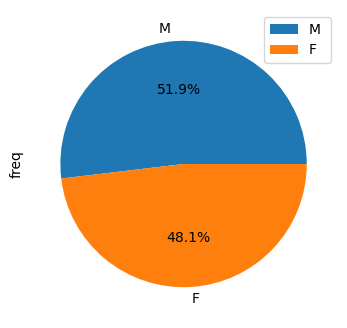

In [55]:
t=pd.crosstab(df1.SEX,'freq')
print(t)
t.plot.pie(subplots=True, autopct='%1.1f%%',figsize = (4, 4)) 

col_0  freq
EN         
EN-     828
EN+    3129


array([<Axes: ylabel='freq'>], dtype=object)

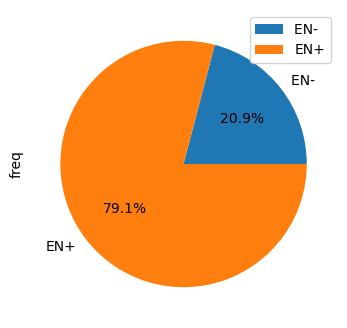

In [56]:
t=pd.crosstab(df1.EN,'freq')
print(t)
t.plot.pie(subplots=True, autopct='%1.1f%%',figsize = (4, 4)) 

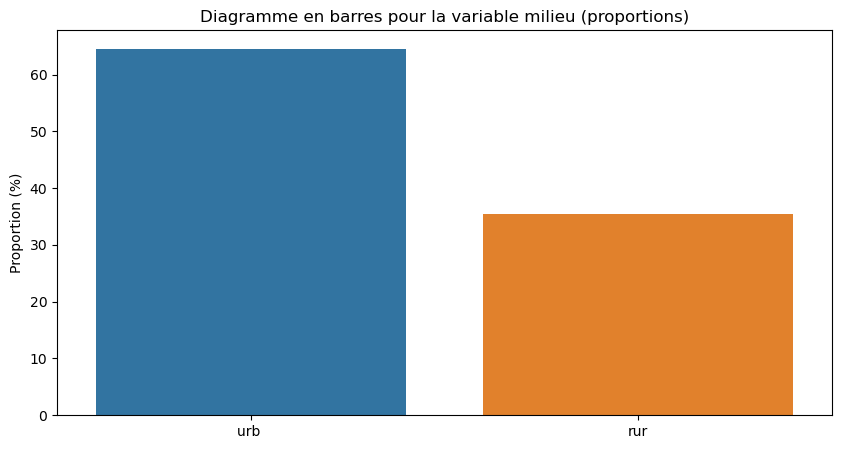

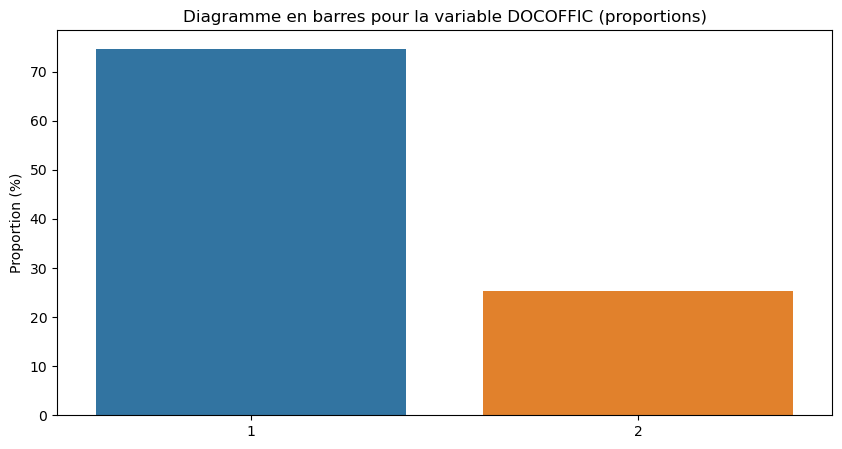

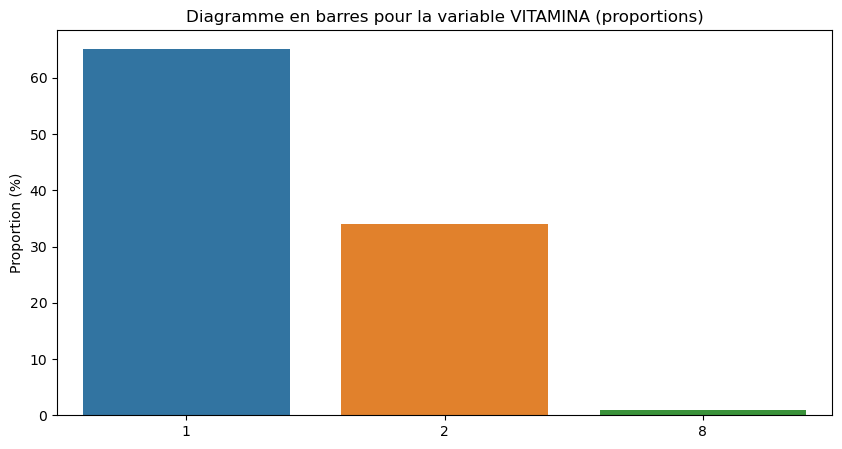

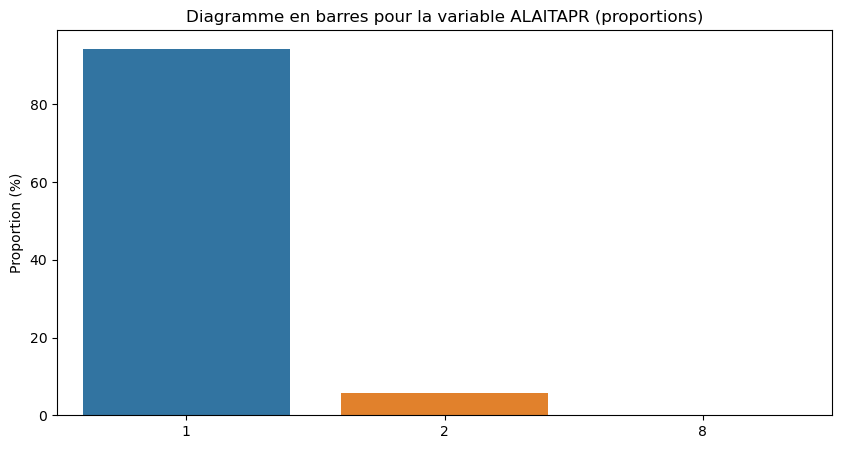

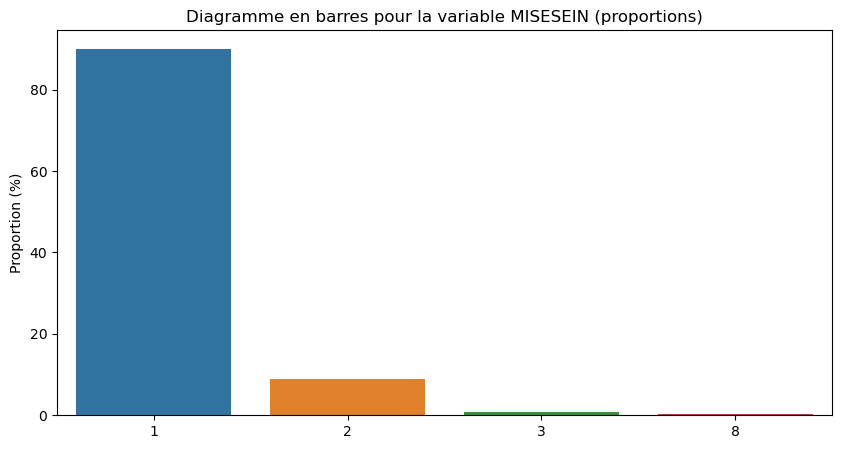

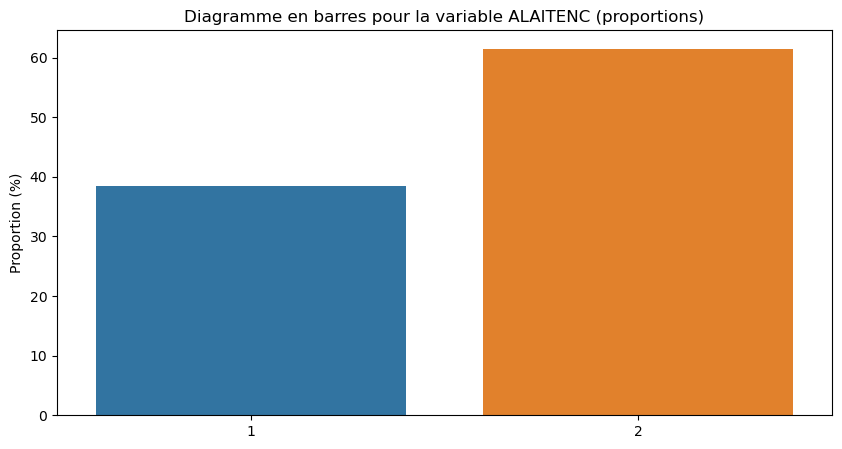

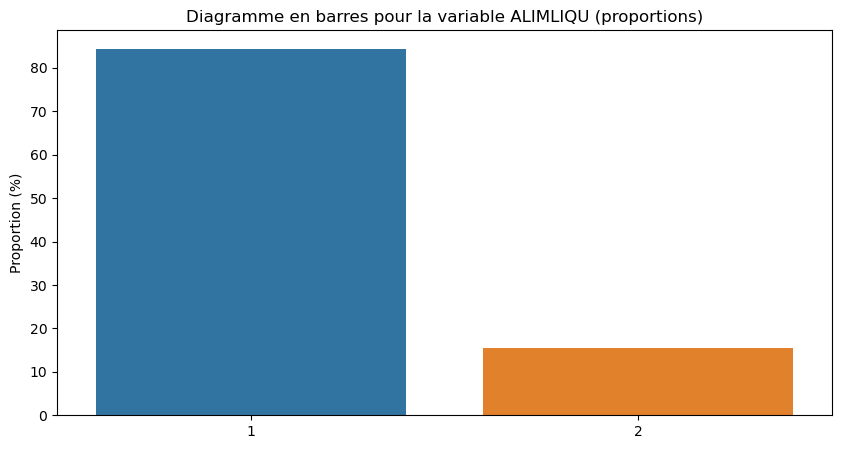

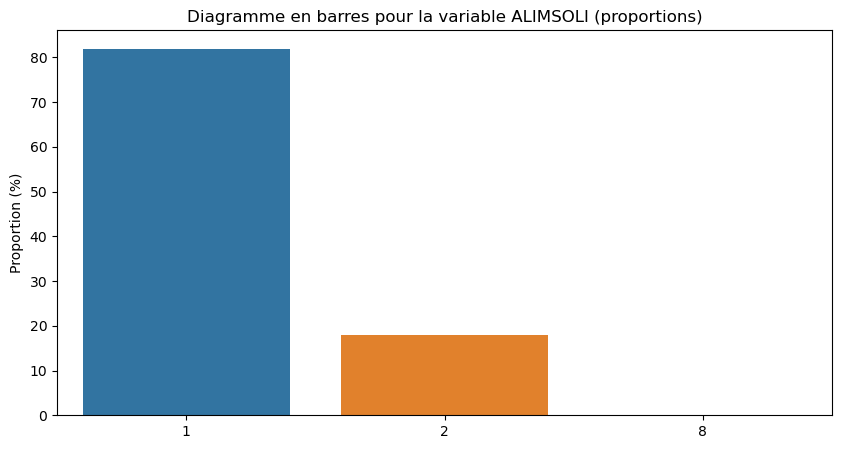

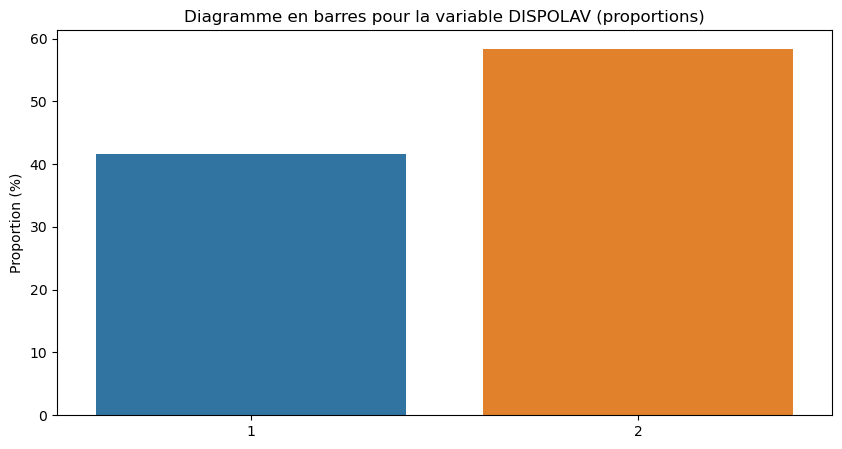

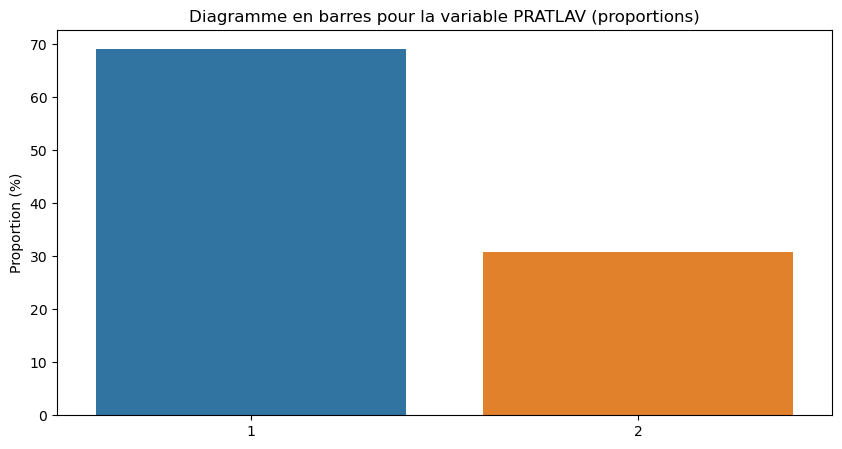

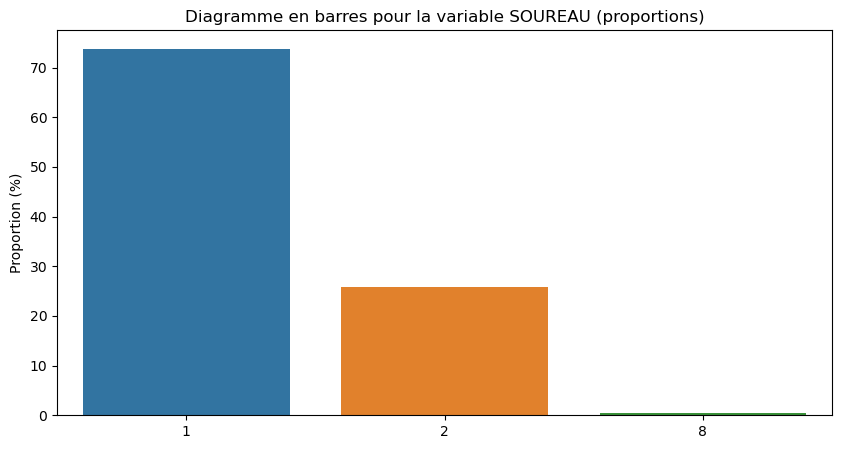

KeyError: 'TRAITEAU'

<Figure size 1000x500 with 0 Axes>

In [57]:
# Afficher les fréquences des variables catégorielles
# Liste des variables qualitatives
categorical_columns = ['milieu','DOCOFFIC',
       'VITAMINA', 'ALAITAPR', 'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
       'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TRAITEAU', 'TOILET','SEX','EDEMA','Allait_Exclu',
        'age_class','strate']


# Créer des graphiques pour les variables catégorielles en termes de proportion
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    proportions = df1[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

In [ ]:
e=pd.crosstab(df1.region,'freq')
print(e)
e.plot.bar() #subplots=True,autopct='%1.1f%%' ,figsize = (10, 10)

In [ ]:
k=pd.crosstab(df1.milieu,'freq')
print(k)
k.plot.pie(subplots=True,autopct='%1.1f%%',figsize = (4, 4))

In [ ]:


# Supposons que vous ayez une liste de noms de variables à analyser
variables = ['DOCOFFIC', 'VITAMINA', 'ALAITAPR', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI',
            'DISPOLAV', 'PRATLAV', 'SOUREAU', 'TRAITEAU', 'TOILET','age_class']

# Créez une boucle pour traiter chaque variable
for variable in variables:
    # Créez une table croisée pour la variable actuelle
    k = pd.crosstab(df1[variable], 'freq')
    
    # Affichez la table croisée
    print(k)
    
    # Créez le graphique en secteurs pour la variable actuelle
    k.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(4, 4), title=f'Pie Chart for {variable}')
    
    # Affichez le graphique
    plt.show()

In [ ]:
C = ['WEIGHT','HEIGHT']
for var in C:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,6))
    sns.histplot(df[var],kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(var )
    plt.show()

##  b) Statistiques descriptives bivariée 

In [58]:
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

## Test du chi-carré (chi2)

###  Hypothèses

H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.

H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on en conclut qu'il y a une association entre les deux variables qualitatives.



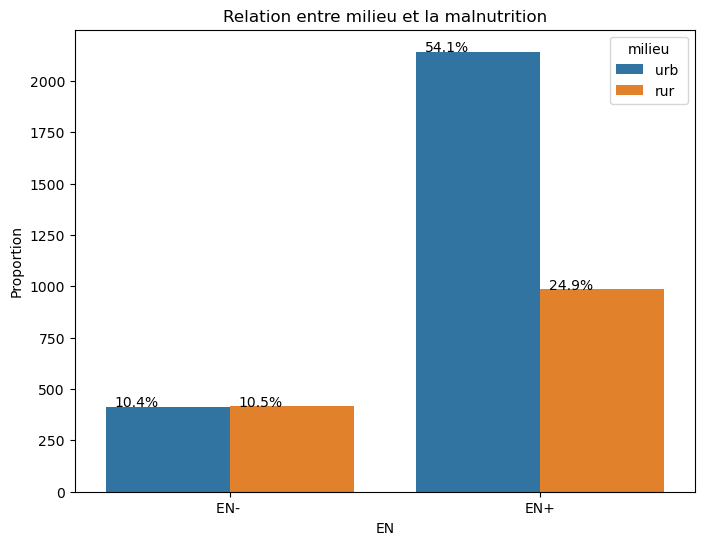

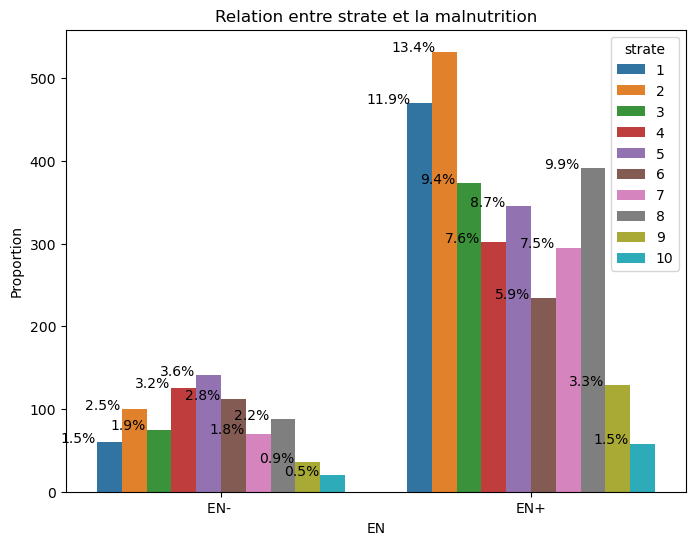

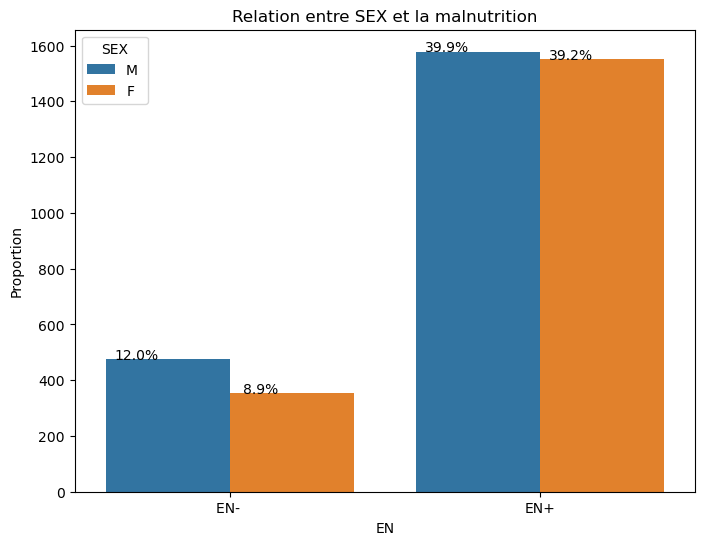

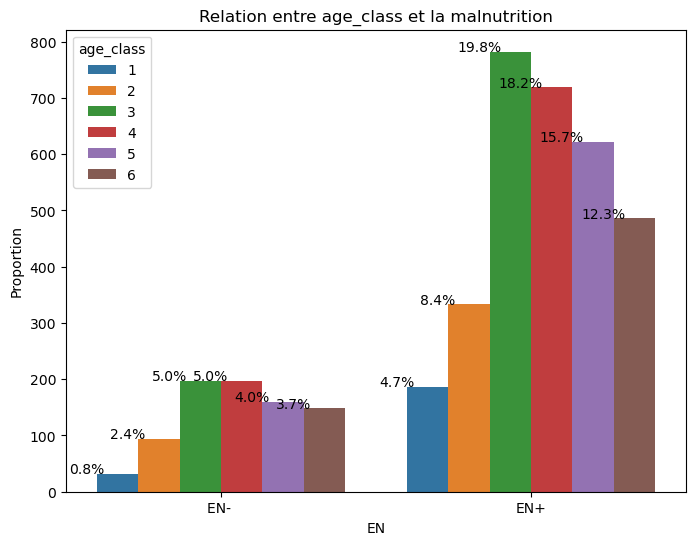

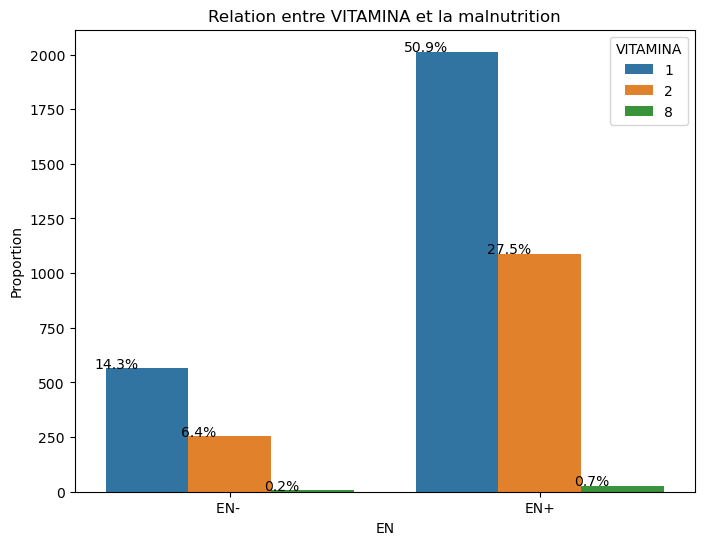

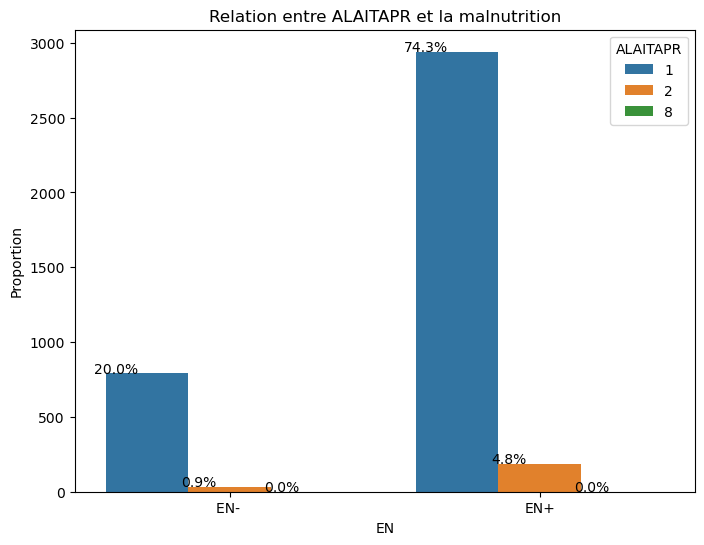

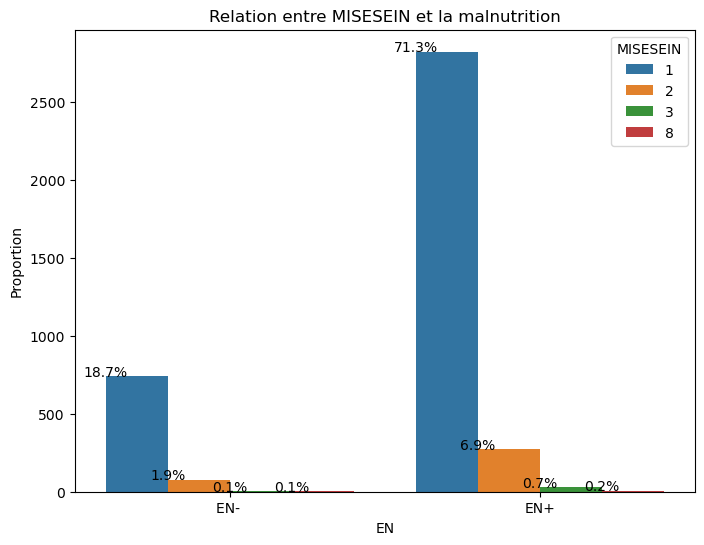

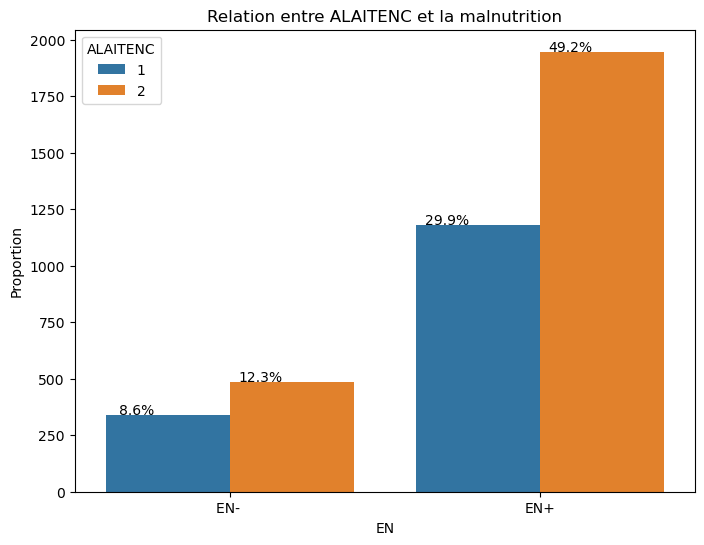

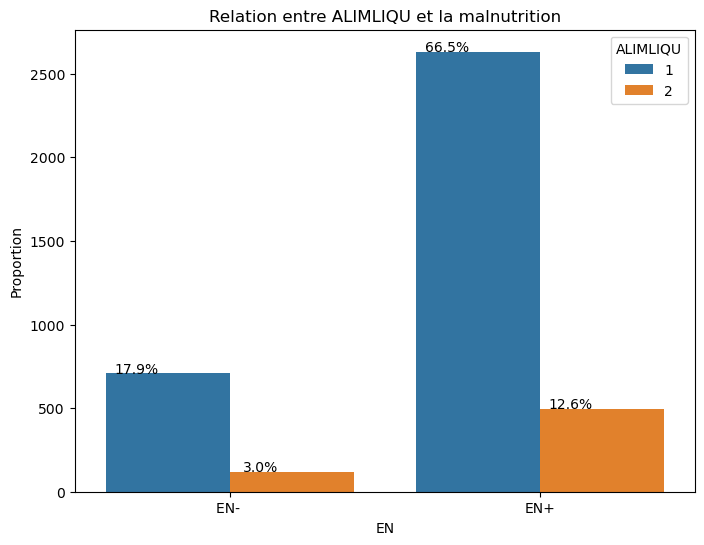

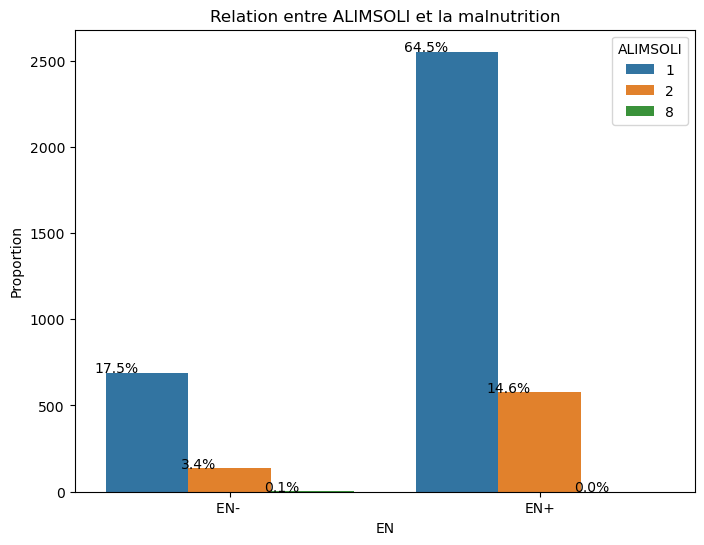

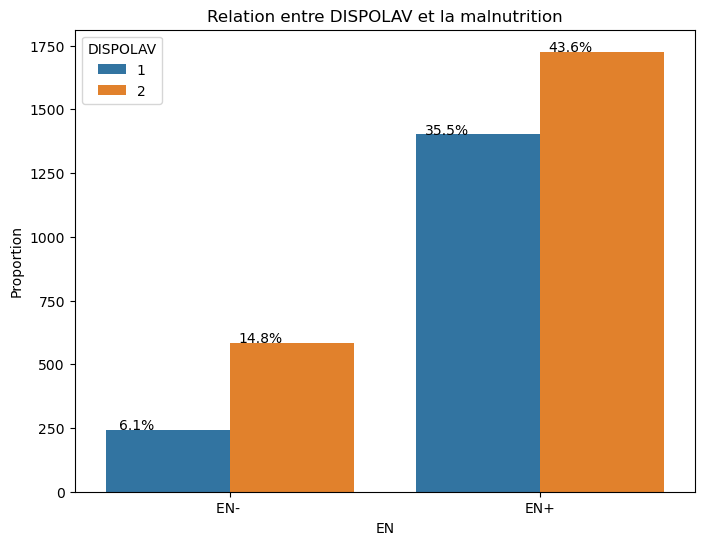

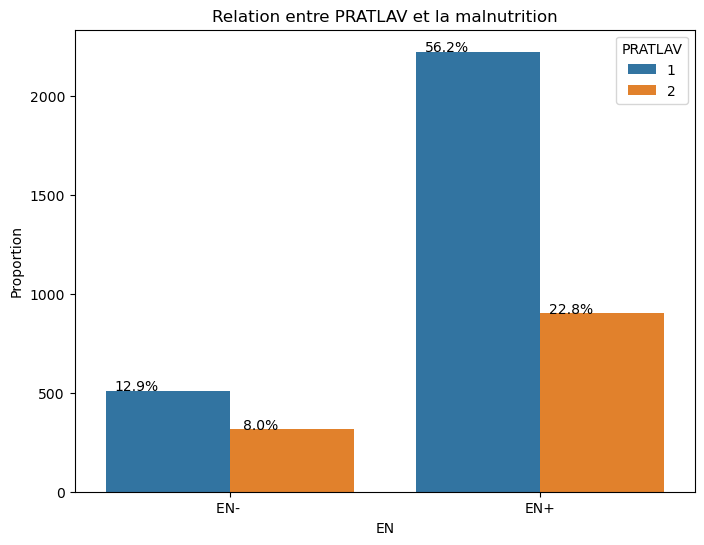

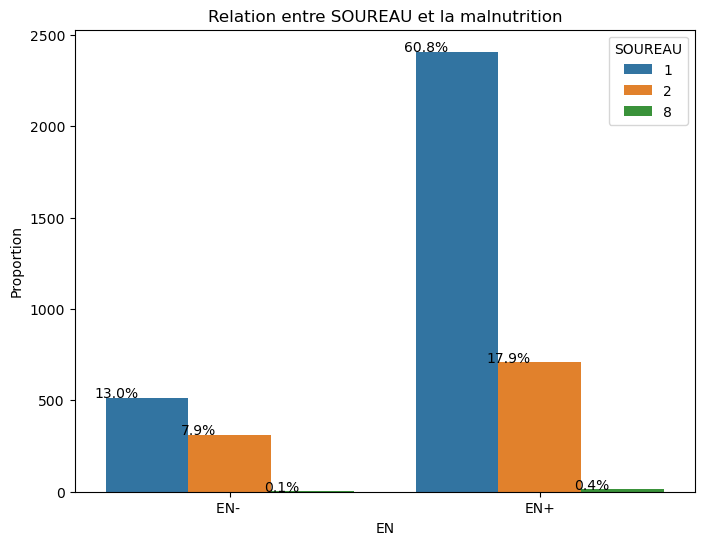

ValueError: Could not interpret input 'TRAITEAU'

<Figure size 800x600 with 0 Axes>

In [59]:
from scipy.stats import chi2_contingency
# Création des graphiques pour voir la relation entre les autres variables et la 'malniutrition' 

d = { 'p_value': [], 'variable': ['milieu','strate','SEX', 'age_class' ,'VITAMINA', 'ALAITAPR',
       'MISESEIN', 'ALAITENC', 'ALIMLIQU', 'ALIMSOLI', 'DISPOLAV', 'PRATLAV',
       'SOUREAU', 'TRAITEAU', 'TOILET']}

for i in d['variable']:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df1, x='EN' , hue=i)
    total = len(df1)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xlabel('EN')
    plt.ylabel('Proportion')
    plt.title(f'Relation entre {i} et la malnutrition')
    plt.show()
    
    contingency_table = pd.crosstab(df1[i], df1['EN'])
    chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)  # Utiliser _ pour ignorer la valeur inutilisée
    d['p_value'].append(p_value)

In [ ]:
pd.DataFrame(d)

In [ ]:
from scipy.stats import chi2_contingency
# Créer un tableau de contingence
contingency_table = pd.crosstab(df1['TOILET'], df1['EN'])
contingency_table

In [ ]:
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)

In [ ]:
# Calculer le coefficient de Cramér-V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

## c) Analyse multidimensionnelle

In [60]:
from prince import MCA
import fanalysis.mca as mca

Ici, nous allons réduire les nombres des variables, on ne va pas travailler sur toutes les variables pour avoir des résultats qui s'affichent bien et qui seront bien interprétés.

In [62]:

df4 = df1[['DOCOFFIC', 'milieu',
        'ALAITENC', 'ALIMSOLI', 'DISPOLAV', 'PRATLAV',
       'SOUREAU', 'TOILET', 'EN']]

In [63]:
#df4["EDEMA"] = df4["EDEMA"].map({1 :"P_d'oedeme" , 2: "A_d'oedeme"})
#df4["milieu"] = df4["milieu"].map({1 :"urb" , 2: "rur"})
df4["DOCOFFIC"] = df4["DOCOFFIC"].map({1 :"doc+" , 2: "doc-"})
#df4["EN"] = df4["MAG"].map({1 :"ma" , 2: "mag-"})
#df4["SEX"] = df4["SEX"].map({1 :"sexeM" , 2: "sexeF"})
df4["TOILET"] = df4["TOILET"].map({1 :"wc+" , 2: "wc-", 8 :"wc.na" })
#df4["Allait_Exclu"] = df4["Allait_Exclu"].map({0 :"P_Allait_Exclu" , 1: "A_Allait_Exclu"})
#df4["TRAITEAU"] = df4["TRAITEAU"].map({1 :"te+" , 2: "te-", 8 :"te.na" })
df4["SOUREAU"] = df4["SOUREAU"].map({1 :"robinet" , 2: "puits", 8 :"autre"})
df4["PRATLAV"] = df4["PRATLAV"].map({1 :"pl+" , 2: "pl-", 8 :"pl.na"})
df4["DISPOLAV"] = df4["DISPOLAV"].map({1 :"dl+" , 2: "dl-", 8 :"dl.na"})
df4["ALIMSOLI"] = df4["ALIMSOLI"].map({1 :"as+" , 2: "as-", 8 :"as.na"})
#df4["ALIMLIQU"] = df4["ALIMLIQU"].map({1 :"O_ALIMLIQU" , 2: "N_ALIMLIQU", 8 :"nsp_ALIMLIQU"})
df4["ALAITENC"] = df4["ALAITENC"].map({1 :"ae+" , 2: "ae-", 8 :"ae.na"})
#df4["MISESEIN"] = df4["MISESEIN"].map({1 :"MISESEIN_1h" , 2: "MISESEIN_23h", 3 :"MISESEIN_24h+",8: "MISESEIN_nsp"})
#df4["ALAITAPR"] = df4["ALAITAPR"].map({1 :"aaa+" , 2: "", 8 :"nsp_ALAITAPR"})
#df4["VITAMINA"] = df4["VITAMINA"].map({1 :"O_VITAMINA" , 2: "N_VITAMINA", 8 :"nsp_VITAMINA"})

C:\Users\tijaa\AppData\Local\Temp\ipykernel_6436\868128610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["DOCOFFIC"] = df4["DOCOFFIC"].map({1 :"doc+" , 2: "doc-"})
C:\Users\tijaa\AppData\Local\Temp\ipykernel_6436\868128610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["TOILET"] = df4["TOILET"].map({1 :"wc+" , 2: "wc-", 8 :"wc.na" })
C:\Users\tijaa\AppData\Local\Temp\ipykernel_6436\868128610.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [64]:
# Création d'une instance de la classe MCA
my_mca = mca.MCA(row_labels=df4.index.values, var_labels=df4.columns)

In [65]:
# Estimation de l'ACM
X =df4.values
my_mca.fit(X)

MCA(row_labels=array([   0,    1,    2, ..., 5578, 5579, 5580], dtype=int64),
    var_labels=Index(['DOCOFFIC', 'milieu', 'ALAITENC', 'ALIMSOLI', 'DISPOLAV', 'PRATLAV',
       'SOUREAU', 'TOILET', 'EN'],
      dtype='object'))

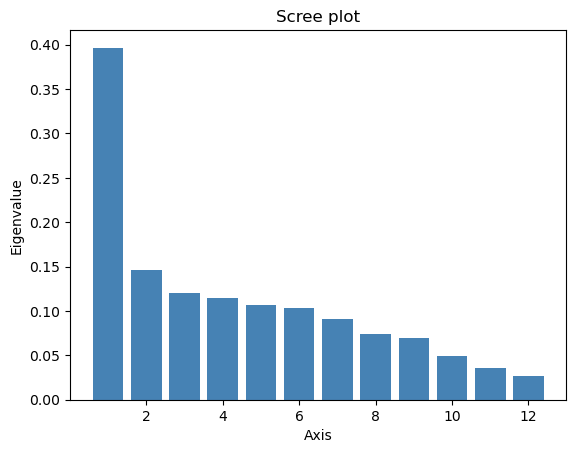

In [66]:
# Graphique des valeurs propres 
my_mca.plot_eigenvalues()

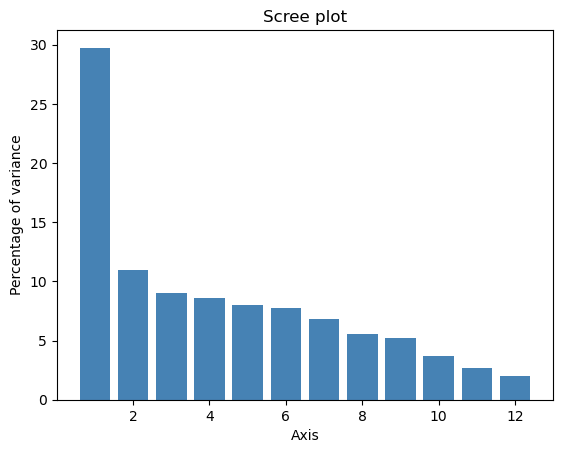

In [67]:
# Pourcentage de variance expliqué
my_mca.plot_eigenvalues(type="percentage")

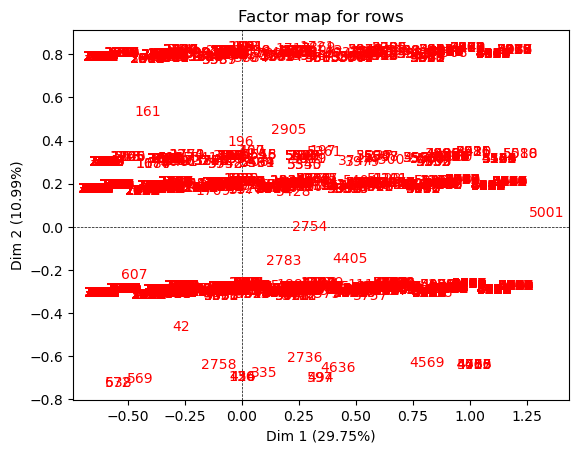

In [68]:
# Graphique profil ligne
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

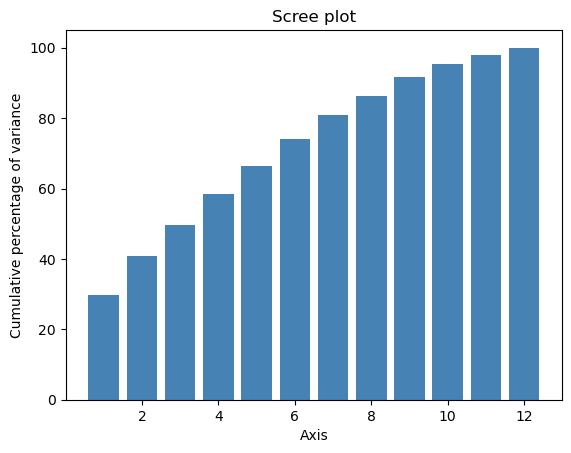

In [69]:
# Variance expliquée cumulée
my_mca.plot_eigenvalues(type="cumulative")

Premier Axe


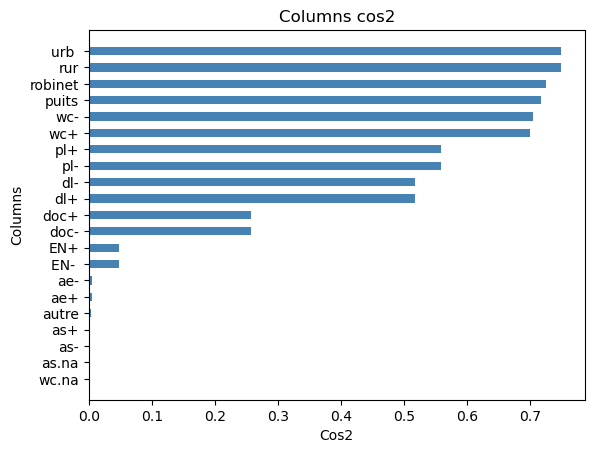

Deuxième  Axe


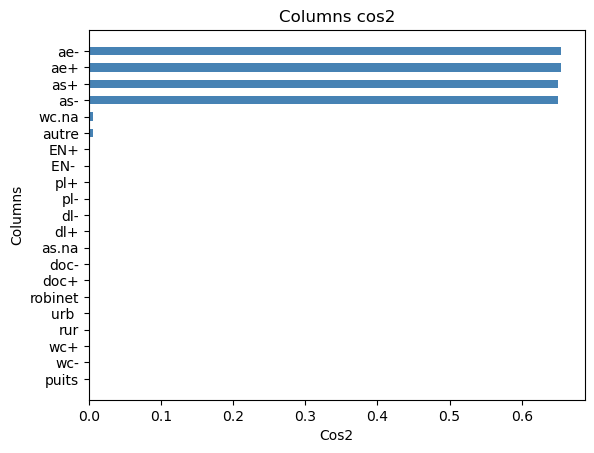

Troisième  Axe


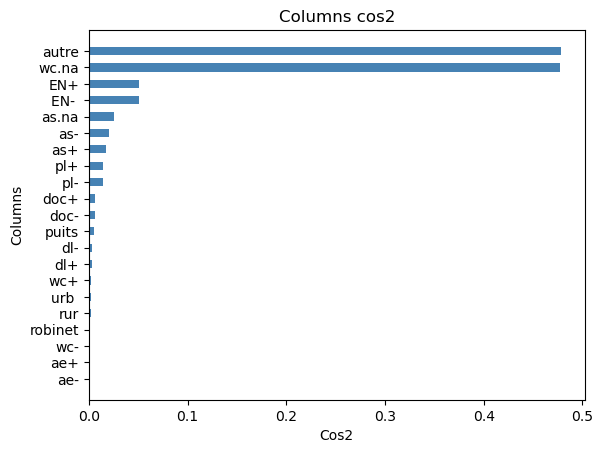

In [70]:

print("Premier Axe")

my_mca.plot_col_cos2(num_axis=1)
print("Deuxième  Axe")

my_mca.plot_col_cos2(num_axis=2)
print("Troisième  Axe")

my_mca.plot_col_cos2(num_axis=3)

Premier Axe


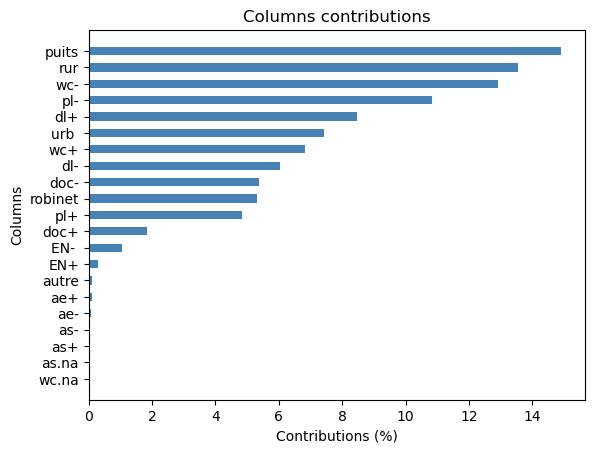

Deuxième  Axe


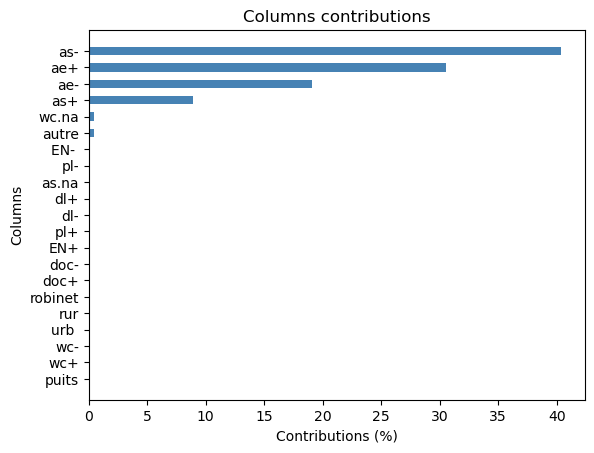

Troisième  Axe


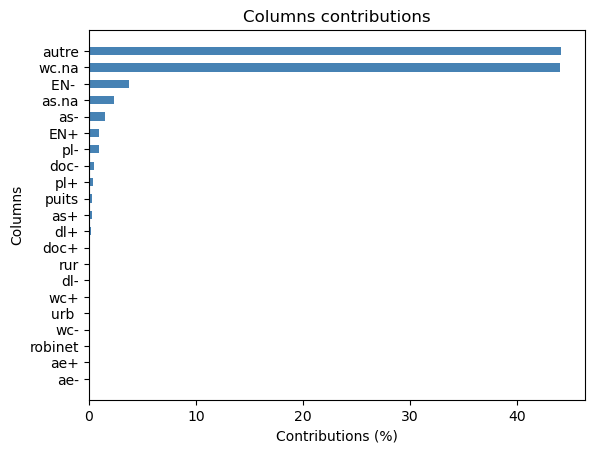

In [71]:
print("Premier Axe")
my_mca.plot_col_contrib(num_axis=1)
print("Deuxième  Axe")
my_mca.plot_col_contrib(num_axis=2)
print("Troisième  Axe")
my_mca.plot_col_contrib(num_axis=3)

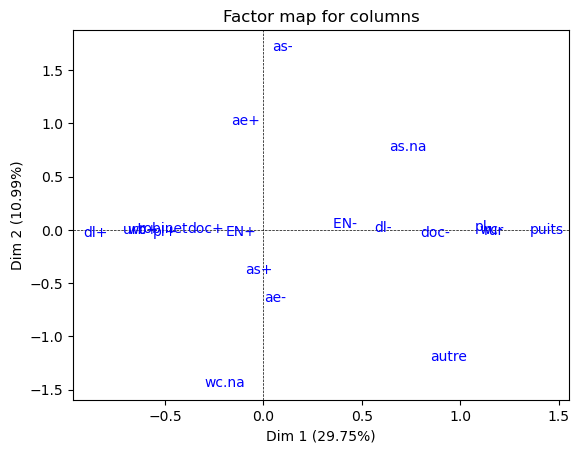

<Figure size 1500x1500 with 0 Axes>

In [72]:

my_mca.mapping_col(num_x_axis=1, num_y_axis=2)
plt.gcf().set_size_inches(15, 15) 
plt.show()

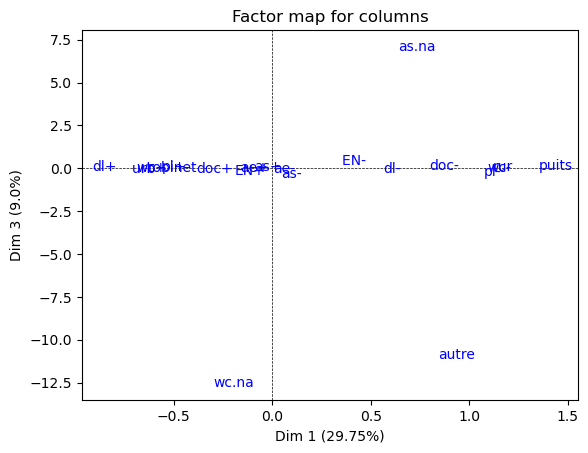

<Figure size 1500x1500 with 0 Axes>

In [73]:
my_mca.mapping_col(num_x_axis=1, num_y_axis=3)
plt.gcf().set_size_inches(15, 15) 
plt.show()

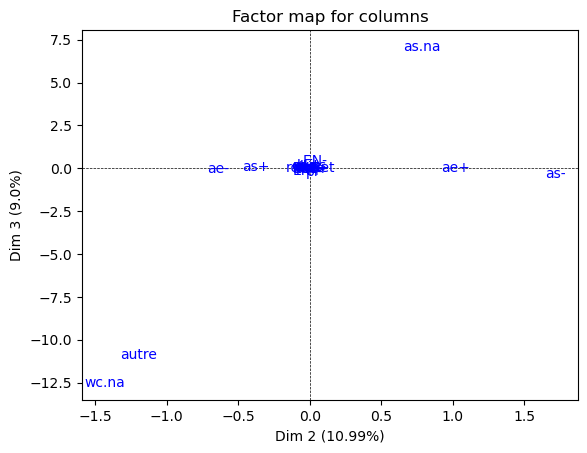

<Figure size 1500x1500 with 0 Axes>

In [74]:
my_mca.mapping_col(num_x_axis=2, num_y_axis=3)
plt.gcf().set_size_inches(15, 15) 
plt.show()

In [75]:
df_rows = my_mca.row_topandas()
#print(df_rows)

## Classification hierchique et ascendante 

In [76]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

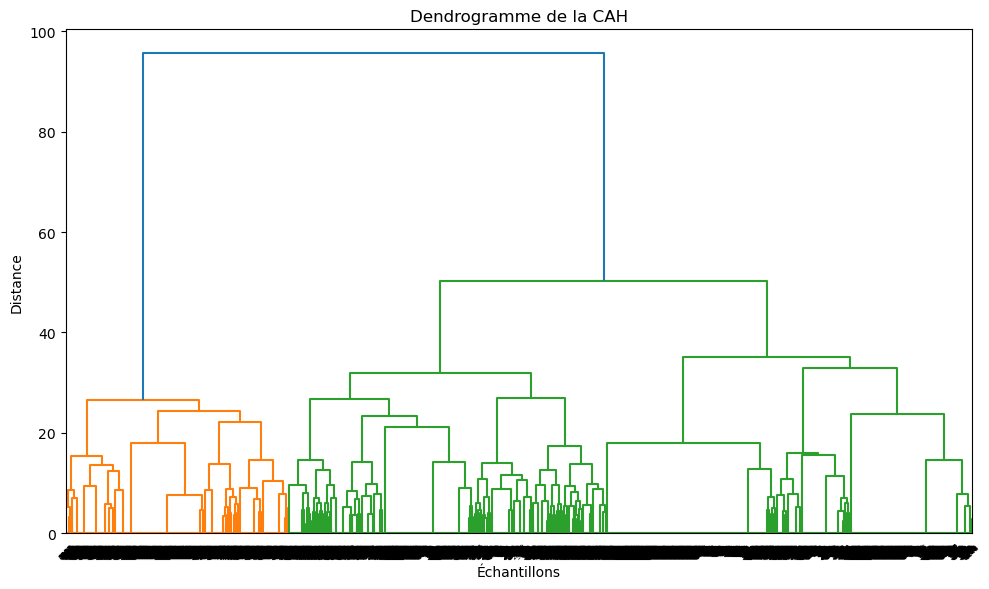

In [77]:
df_encoded = pd.get_dummies(df4)

# Conversion du DataFrame en matrice NumPy
data = df_encoded.to_numpy()

# Calcul de la matrice de distance avec la méthode 'ward'
linkage_matrix = linkage(data, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_encoded.index, orientation='top')
plt.xlabel('Échantillons')
plt.ylabel('Distance')
plt.title('Dendrogramme de la CAH')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

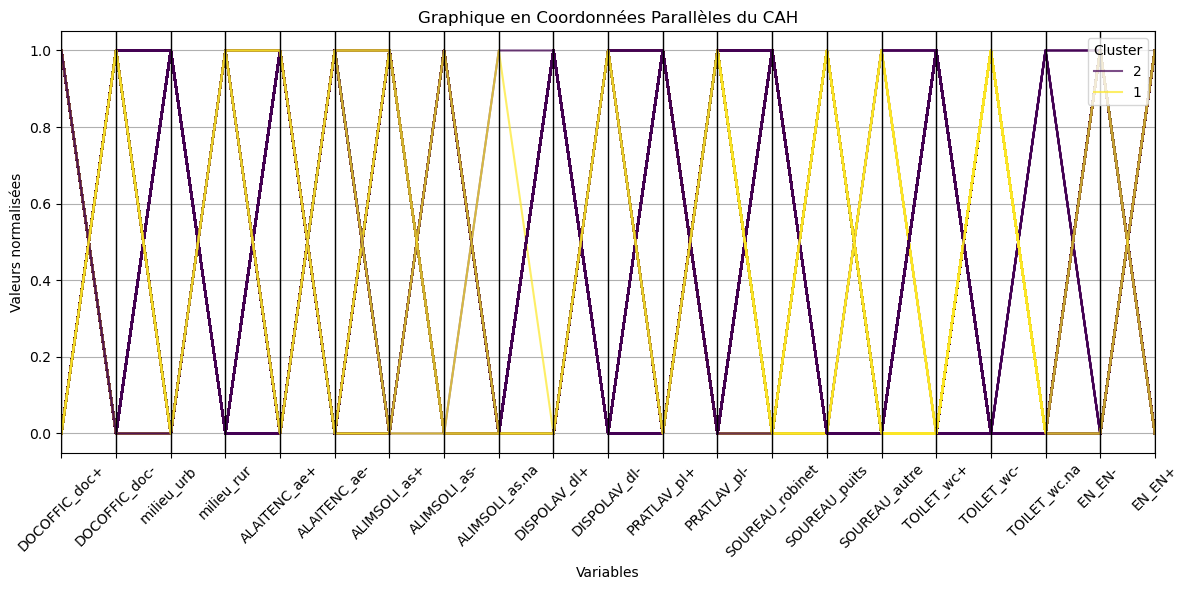

In [78]:
from pandas.plotting import parallel_coordinates

# Effectuer l'encodage One-Hot des variables catégorielles
df_encoded = pd.get_dummies(df4)

# Conversion du DataFrame en matrice NumPy
data = df_encoded.to_numpy()

# Calcul de la matrice de distance avec la méthode 'ward'
linkage_matrix = linkage(data, method='ward')

# Détermination du nombre de clusters à obtenir
num_clusters = 2

# Attribuer des étiquettes de cluster en utilisant la fonction fcluster
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les étiquettes de cluster au DataFrame
df_encoded['Cluster'] = cluster_labels

# Créer le graphique en coordonnées parallèles
plt.figure(figsize=(12, 6))
parallel_coordinates(df_encoded, 'Cluster', colormap='viridis', alpha=0.7)
plt.title('Graphique en Coordonnées Parallèles du CAH')
plt.xlabel('Variables')
plt.ylabel('Valeurs normalisées')
plt.legend(title='Cluster', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()